In [1]:
# Import packages
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.options.display.max_colwidth = 2500
pd.set_option("display.max_columns", None)

import re

# Dataset

In [2]:
# load appraisal well data

path = "../data/raw/Volve production data.xlsx"

data = pd.read_excel(path, sheet_name="Daily Production Data")

data.dropna(axis=1, how="all", inplace=True)

print(data.shape)

data.columns = [col.lower() for col in data.columns]

drop_cols = [c for c in list(data) if data[c].nunique() <= 1]

data.drop(columns=drop_cols, inplace=True)
print(data.shape)

data.head()

(15832, 24)
(15832, 19)


,dateprd,well_bore_code,npd_well_bore_code,npd_well_bore_name,on_stream_hrs,avg_downhole_pressure,avg_downhole_temperature,avg_dp_tubing,avg_annulus_press,avg_choke_size_p,avg_whp_p,avg_wht_p,dp_choke_size,bore_oil_vol,bore_gas_vol,bore_wat_vol,bore_wi_vol,flow_kind,well_type
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,0.0,0.00000,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,0.0,310.37614,96.87589,277.27826,0.0,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [3]:
data["npd_well_bore_name"].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-4', '15/9-F-5', '15/9-F-15'], dtype=object)

In [4]:
print(data.shape)
data = data[~((data["well_type"] == "WI") & (data["npd_well_bore_name"] == "15/9-F-1 C"))]
data = data[~((data["well_type"] == "OP") & (data["npd_well_bore_name"] == "15/9-F-5"))]
data = data[~(data["npd_well_bore_name"] == "15/9-F-15")]

print(data.shape)

(15832, 19)
(15489, 19)


In [5]:
data["cat"] = data.apply(
    lambda x: re.split("-", x["npd_well_bore_name"])[1]
    + "-"
    + re.split("-", x["npd_well_bore_name"])[2],
    axis=1,
)

dictionary = dict(zip(data["npd_well_bore_name"], data["cat"]))
print(dictionary)

data.drop(columns=["well_bore_code", "npd_well_bore_code", "npd_well_bore_name", "flow_kind"], inplace=True)

data.rename(columns={"well_type": "group", "dateprd": "date"}, inplace=True)

data.reset_index(drop=True, inplace=True)

print(data.shape)
data.head()

{'15/9-F-1 C': 'F-1 C', '15/9-F-11': 'F-11', '15/9-F-12': 'F-12', '15/9-F-14': 'F-14', '15/9-F-15 D': 'F-15 D', '15/9-F-4': 'F-4', '15/9-F-5': 'F-5'}
(15489, 16)


,date,on_stream_hrs,avg_downhole_pressure,avg_downhole_temperature,avg_dp_tubing,avg_annulus_press,avg_choke_size_p,avg_whp_p,avg_wht_p,dp_choke_size,bore_oil_vol,bore_gas_vol,bore_wat_vol,bore_wi_vol,group,cat
0,2014-04-07,0.0,0.00000,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,OP,F-1 C
1,2014-04-08,0.0,NaN,NaN,NaN,0.0,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,OP,F-1 C
2,2014-04-09,0.0,NaN,NaN,NaN,0.0,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,OP,F-1 C
3,2014-04-10,0.0,NaN,NaN,NaN,0.0,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,OP,F-1 C
4,2014-04-11,0.0,310.37614,96.87589,277.27826,0.0,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,OP,F-1 C


In [6]:
d = {
    "15/9-F-4": (435654.01, 6477677.22),
    "15/9-F-5": (436403.89, 6478703.6),
    "15/9-F-14": (436028.94, 6478876.54),
    "15/9-F-1 C": (435584.78, 6479497.27),
    "15/9-F-11": (436551.57, 6478399.73),
    "15/9-F-12": (435335.51, 6478201.54),
    "15/9-F-15 D": (436650.23, 6478716.35),
    # "15/9-F-15": (434105.85, 6476758.93),
}
df = pd.DataFrame.from_dict(d).T
df.reset_index(inplace=True)
df.columns = ["NPD_WELL_BORE_NAME", "x", "y"]

df["cat"] = df["NPD_WELL_BORE_NAME"].map(dictionary)

df.drop(columns=["NPD_WELL_BORE_NAME"], inplace=True)

path = "../data/interim/volve_coords.csv"

df.to_csv(path, index=False)

print(data.shape)
df

(15489, 16)


,x,y,cat
0,435654.01,6477677.22,F-4
1,436403.89,6478703.60,F-5
2,436028.94,6478876.54,F-14
3,435584.78,6479497.27,F-1 C
4,436551.57,6478399.73,F-11
5,435335.51,6478201.54,F-12
6,436650.23,6478716.35,F-15 D


In [7]:
rename_dict = {
    "on_stream_hrs": "onStream", 
    "avg_downhole_pressure": "bhp",
    "avg_downhole_temperature": "bht",
    "avg_choke_size_p": "choke",
    "bore_oil_vol": "oil",
    "bore_wat_vol": "water",
    "bore_wi_vol": "waterInj",
    }
data.rename(columns=rename_dict, inplace=True)
data.head()

,date,onStream,bhp,bht,avg_dp_tubing,avg_annulus_press,choke,avg_whp_p,avg_wht_p,dp_choke_size,oil,bore_gas_vol,water,waterInj,group,cat
0,2014-04-07,0.0,0.00000,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,OP,F-1 C
1,2014-04-08,0.0,NaN,NaN,NaN,0.0,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,OP,F-1 C
2,2014-04-09,0.0,NaN,NaN,NaN,0.0,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,OP,F-1 C
3,2014-04-10,0.0,NaN,NaN,NaN,0.0,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,OP,F-1 C
4,2014-04-11,0.0,310.37614,96.87589,277.27826,0.0,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,OP,F-1 C


In [8]:
for col in ["choke", "oil", "water"]:
    data[col] = np.where(data["cat"] == "F-5", np.nan, data[col])

data["water"] = np.where(data["water"] < 0, np.nan, data["water"])

In [9]:
data["liquid"] = data["oil"] + data["water"]
data["watercut"] = data["water"] / data["liquid"]

In [10]:
data.groupby(["cat", "group"]).agg(
    {
        "waterInj": "count",
        "bhp": "count",
        "choke": "count",
        "oil": "count",
        "water": "count",
        "liquid": "count",
        "watercut": "count",
    }
)

,,waterInj,bhp,choke,oil,water,liquid,watercut
cat,group,,,,,,,
F-1 C,OP,0,742,745,745,745,745,429
F-11,OP,0,1159,1163,1165,1165,1165,1123
F-12,OP,0,3050,3012,3056,3054,3054,2835
F-14,OP,0,3050,2860,3056,3054,3054,2722
F-15 D,OP,0,978,978,978,978,978,767
F-4,WI,2990,0,0,0,0,0,0
F-5,WI,2716,0,0,0,0,0,0


In [11]:
d = {
    "OP": "P",
    "WI": "I",
}
data["group"] = data["group"].map(d)

In [32]:
data['date_ym'] = data.date.dt.strftime('%Y-%m')

data.groupby(['cat', 'date_ym']).mean().count()

C:\Users\Artyom\AppData\Local\Temp\ipykernel_31968\2192521328.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['cat', 'date_ym']).mean().count()


onStream             514
bhp                  305
bht                  305
avg_dp_tubing        305
avg_annulus_press    287
choke                303
avg_whp_p            310
avg_wht_p            309
dp_choke_size        514
oil                  305
bore_gas_vol         310
water                305
waterInj             200
liquid               305
watercut             293
dtype: int64

In [27]:
path = "../data/interim/volve_data.csv"

data.to_csv(path, index=False)

In [35]:
data.groupby('group').count()

,date,onStream,bhp,bht,avg_dp_tubing,avg_annulus_press,choke,avg_whp_p,avg_wht_p,dp_choke_size,oil,bore_gas_vol,water,waterInj,cat,liquid,watercut
group,,,,,,,,,,,,,,,,,
I,6489,6204,0,0,0,16,0,16,15,6201,0,16,0,5706,6489,0,0
P,9000,9000,8979,8979,8979,7730,8758,8994,8994,8994,9000,9000,8996,0,9000,8996,7876


In [17]:
data.date

0       2014-04-07
1       2014-04-08
2       2014-04-09
3       2014-04-10
4       2014-04-11
           ...    
15484   2016-09-09
15485   2016-09-10
15486   2016-09-11
15487   2016-09-12
15488   2016-09-18
Name: date, Length: 15489, dtype: datetime64[ns]

In [24]:
data.date.dt.strftime('%Y-%m').value_counts().count()

112

<Axes: >

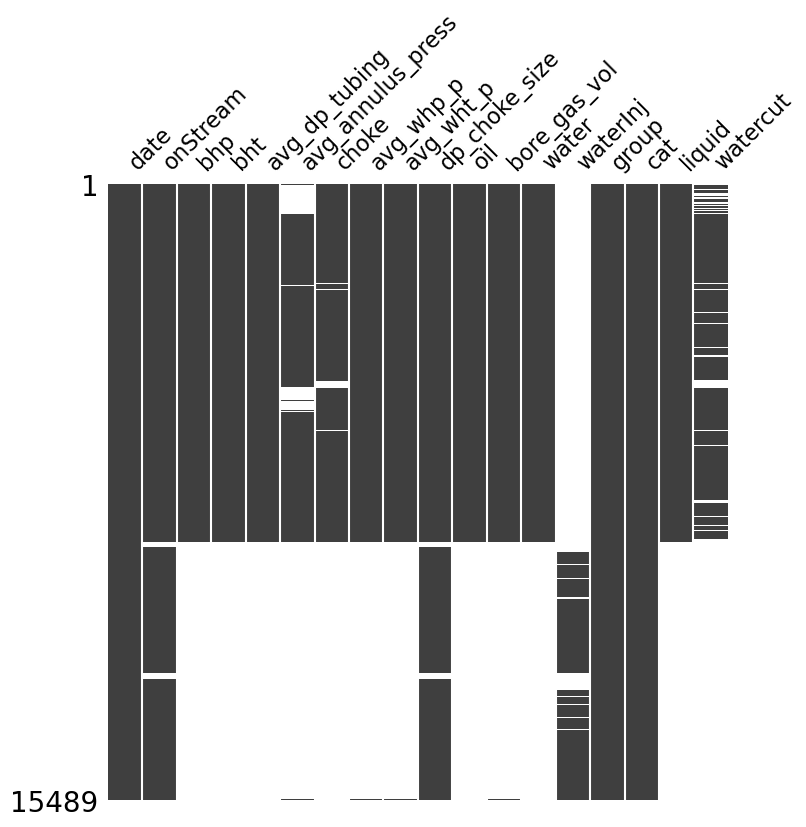

In [14]:
import missingno as msno

# Визуализируем матрицу Missingno
msno.matrix(data, sparkline=False, figsize=(8, 8))